# <center> Финальное задание</center>

<center>
<img src="https://www.hse.ru/images/main_en/hse_ru_logo.svg">

## Курс "Введение в машинное обучение"
#### Национальный исследовательский университет "Высшая школа экономики" & Yandex School of Data Analysis
    
## Неделя 7. Финальный проект

</center>

## Общие сведения
<div>
  <figcaption>
      <br><b>Автор работы:</b> 
      Ооржак Александр Юрьевич
    </figcaption>
</div>
<div>
    <div><b>Цель проекта:</b> Предсказание команды-победителя по первым 5 минутам игры в Dota 2.</div>
    <div><b>Описание исходных данных:</b> Имеются данные <a href="https://www.kaggle.com/c/dota-2-win-probability-prediction">соревнований</a> Kaggle, а именно:<br></div>
    
Dota 2 — многопользовательская компьютерная игра жанра MOBA. Игроки играют между собой матчи. В каждом матче, как правило, участвует 10 человек. Матчи формируются из живой очереди, с учётом уровня игры всех игроков. Перед началом игры игроки автоматически разделяются на две команды по пять человек. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника, трон.

Нужно построить модель, которая по данным о первых пяти минутах матча будет предсказывать его исход — то есть определять команду-победителя.

## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru), мы будем рассматривать режим [Captain's Mode](http://dota2.gamepedia.com/Game_modes/ru#Captain.27s_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

## Задача: предсказание победы по данным о первых 5 минутах игры

По первым 5 минутам игры предсказать, какая из команд победит: Radiant или Dire?

## Набор данных

Набор данных с матчами записан в файле `matches.jsonlines.bz2`.
В каталоге `dictionaries` приведены расшифровки идентификаторов, которые присутствуют в записях матчей.

#### Чтение информации о матчах

Информация о матчах записана в сжатом текстовом файле `matches.jsonlines.bz2`, каждая строчка которого содержит объект в формате [JSON](https://ru.wikipedia.org/wiki/JSON). Запись в формате JSON преобразуется в python-объект при помощи стандартного модуля `json`. Пример чтения матчей:

In [2]:
import json
import bz2

with bz2.BZ2File('data/matches.jsonlines.bz2') as matches_file:
    for line in matches_file:
        match = json.loads(line)
        
        # Обработка матча
        break

In [3]:
match

{'picks_bans': [{'is_pick': False, 'hero_id': 95, 'order': 0, 'team': 1},
  {'is_pick': False, 'hero_id': 39, 'order': 1, 'team': 0},
  {'is_pick': False, 'hero_id': 99, 'order': 2, 'team': 1},
  {'is_pick': False, 'hero_id': 41, 'order': 3, 'team': 0},
  {'is_pick': True, 'hero_id': 42, 'order': 4, 'team': 1},
  {'is_pick': True, 'hero_id': 68, 'order': 5, 'team': 0},
  {'is_pick': True, 'hero_id': 22, 'order': 6, 'team': 0},
  {'is_pick': True, 'hero_id': 64, 'order': 7, 'team': 1},
  {'is_pick': False, 'hero_id': 73, 'order': 8, 'team': 1},
  {'is_pick': False, 'hero_id': 11, 'order': 9, 'team': 0},
  {'is_pick': False, 'hero_id': 97, 'order': 10, 'team': 1},
  {'is_pick': False, 'hero_id': 93, 'order': 11, 'team': 0},
  {'is_pick': True, 'hero_id': 98, 'order': 12, 'team': 0},
  {'is_pick': True, 'hero_id': 47, 'order': 13, 'team': 1},
  {'is_pick': True, 'hero_id': 88, 'order': 14, 'team': 0},
  {'is_pick': True, 'hero_id': 110, 'order': 15, 'team': 1},
  {'is_pick': False, 'hero_

#### Описание полей в записи матча

```python
{
    "match_id": 247,            # идентификатор матча
    "start_time": 1430514316,   # дата/время начала матча, unixtime
    "lobby_type": 0,            # тип комнаты, в которой собираются игроки 
                                #   (расшифровка в dictionaries/lobbies.csv)
 
    # стадия выбора героев
    "picks_bans": [
        {
            "order": 0,       # порядковый номер действия
            "is_pick": false, # true если команда выбирает героя, false — если банит
            "team": 1,        # команда, совершающая действие (0 — Radiant, 1 — Dire)
            "hero_id": 95     # герой, связанный с действием 
                              #    (расшифровка в dictionaries/heroes.csv)
        }, 
        ...
    ],

    # информация про каждого игрока, список ровно из 10 элементов
    # игроки с индексами от 0 до 4 — из команды Radiant, от 5 до 9 — Dire
    "players": [ 
        { 
        
            # герой игрока (расшифровка в dictionaries/heroes.csv)
            "hero_id": 67,  

            # временные ряды (отсчеты указаны в поле "times")
            "xp_t": [0, 13, 115, 177, 335, ...],   # опыт
            "gold_t": [0, 99, 243, 343, 499, ...], # золото + стоимость всех купленных вещей (net worth)
            "lh_t": [0, 0, 2, 2, 2, ...],          # количество убитых юнитов (не героев) противника

            # список событий: улучшение способностей героя
            "ability_upgrades": [
                {
                    "time": 51,      # игровое время
                    "level": 1,      # уровень игрока, на котором произошло улучшение
                    "ability": 5334  # способность, которая была улучшена 
                                     # (расшифровка в dictionaries/abilities.csv)
                }, 
                ...
            ],

            # список событий: убийства
            "kills_log": [
                {
                    "time": 831,    # игровое время
                    "player": 7,    # индекс игрока, чей герой был убит 
                                    #   (не заполнено, если был убит не герой)
                    "unit": "npc_dota_hero_viper" # тип убитого юнита
                }, 
                ...
            ],

            # список событий: покупка предметов
            "purchase_log": [
                {
                    "time": -73,     # игровое время
                                     #   точка отсчета игрового времени (ноль) начинается через
                                     #   несколько минут после фактического начала матча, поэтому
                                     #   время некоторых событий может быть отрицательным
                    "item_id": 44    # купленный предмер (расшифровка в dictionaries/items.csv)
                }, 
                ...
            ]

            # список событий: выкуп героя из таверны
            "buyback_log": [
                {"time": 2507},
                ...
            ],

            # список событий: установка героем "наблюдателей", позволяющих команде 
            # следить за чатью игрового поля на некотором расстоянии от точки установки
            "obs_log": [
                {
                    "time": 1711,    # игровое время установки
                    "xy": [111, 130] # координаты игрового поля
                }, 
                ...
            ],
            "sen_log": [], # аналогично полю obs_log, другой тип "наблюдателя"

        },
        ...
    ],
    
    # отсчеты игрового времени, в которые вычисляются значения временных рядов
    "times": [0, 60, 120, 180, ...],

    # ключевые события игры
    "objectives": [
        {
            "time": 198,           # время события
            "type": "firstblood",  # тип события
            "player1": 6,          # параметры события, могут содержать
            "player2": 1           #   индексы игроков (player), 
                                   #   номер команды (team, 0 — Radiant, 1 — Dire)
        }, 
        {
            "time": 765, 
            "type": "tower_kill", 
            "player": 7, 
            "team": 1
        }, 
        ...
    ]
    
    # итог матча (отсутствует в тестовых матчах)
    "finish": {
        "duration": 2980,             # длительность в секундах
        "radiant_win": false,         # true, если победила команда Radiant
        "tower_status_radiant": 0,    # состояние башен у команд к концу игры
        "tower_status_dire": 1972,    #   (см. описание битовой маски)
        "barracks_status_dire": 63,   # состояние бараков у команд к концу игры
        "barracks_status_radiant": 0  #   (см. описание битовой маски)
    }
}
```

#### Описание полей состояния башен и бараков

Состояние башен к концу игры задается целым числом, закодировано в битах:

```
┌─┬─┬─┬─┬─────────────────────── Not used.
│ │ │ │ │ ┌───────────────────── Ancient Bottom
│ │ │ │ │ │ ┌─────────────────── Ancient Top
│ │ │ │ │ │ │ ┌───────────────── Bottom Tier 3
│ │ │ │ │ │ │ │ ┌─────────────── Bottom Tier 2
│ │ │ │ │ │ │ │ │ ┌───────────── Bottom Tier 1
│ │ │ │ │ │ │ │ │ │ ┌─────────── Middle Tier 3
│ │ │ │ │ │ │ │ │ │ │ ┌───────── Middle Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ ┌─────── Middle Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ ┌───── Top Tier 3
│ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─── Top Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─ Top Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
```

Состояние бараков к концу игры закодировано в битах целого числа:

```
┌─┬───────────── Not used.
│ │ ┌─────────── Bottom Ranged
│ │ │ ┌───────── Bottom Melee
│ │ │ │ ┌─────── Middle Ranged
│ │ │ │ │ ┌───── Middle Melee
│ │ │ │ │ │ ┌─── Top Ranged
│ │ │ │ │ │ │ ┌─ Top Melee
│ │ │ │ │ │ │ │
0 0 0 0 0 0 0 0
```

## Извлечение признаков

Скрипт extract_features.py производит извлечение признаков из известной информации о матче за первые 5 игровых минут, составляет из них таблицу. Таблица поможет вам быстрее сформировать матрицу объект-признак, вектор ответов и начать применять методы машинного обучения для решения поставленной задачи.

Признаки, представленные в таблице `features.csv`, по мнению экспертов в предметной области являются наиболее важными для решения задачи предсказания победы команды. Тем не менее, не обязательно использовать эти признаки в исходном виде для применения методов машинного обучения — вы можете сделать новые признаки из имеющихся. Более того, признаки в файле `features.csv` содержат не всю информацию, известную про матч за первые 5 игровых минут. Вы можете использовать скрипт `extract_features.py` как пример и добавлять свои признаки для улучшения качества предсказания.

#### Пример чтения файла с признаками

In [4]:
import pandas
features = pandas.read_csv('data/features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

## Метрика качества

В качестве метрики качества мы будем использовать площадь под ROC-кривой (AUC-ROC). Обратите внимание, что AUC-ROC — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Оба алгоритма, которые будут использоваться в проекте — градиентный бустинг, и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict_proba. Она возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:
```python
pred = clf.predict_proba(X_test)[:, 1]
```

## Руководство по решению

Вам необходимо провести описанные ниже два этапа исследования, написать по результатам каждого этапа небольшой отчет (ниже указаны вопросы, ответы на которые должны содержаться в отчете), и предоставить для ревью данный отчет и код, с помощью которого вы выполнили задание.

**Обратите внимание:** высокое качество работы на кросс-валидации (близкое к 100%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Возможно, вы заглядываете в будущее или настраиваетесь на неправильном наборе признаков.

### Подход 1: градиентный бустинг "в лоб"
Один из самых универсальных алгоритмов, изученных в нашем курсе, является градиентный бустинг. Он не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на многих наборах данных, что и обуславливает его популярность. Вполне разумной мыслью будет попробовать именно его в первую очередь.

1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.
3. Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.
3. Какой столбец содержит целевую переменную? Запишите его название.
4. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
2. Как называется столбец, содержащий целевую переменную?
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?


##### Рекомендации и советы

- Если все работает очень медлено:
   - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
   - Попробуйте упростить модель — например, уменьшить глубину деревьев в градиентом бустинге (max_depth).
   
##### Измерение времени работы кода
```python
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # вместо этой строчки разместить замеряемый код

print 'Time elapsed:', datetime.datetime.now() - start_time
```

### Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

**Важно:** не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?
3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).
4. Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.
5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
3. Сколько различных идентификаторов героев существует в данной игре?
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?


##### Код для формирования "мешка слов" по героям
```python
# N — количество различных героев в выборке
X_pick = np.zeros((data.shape[0], N))

for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
```

# Подход 1. Градиентный бустинг в "лоб". Решение

**1)** Считаем данные обучающей выборки из файла "features.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import linear_model #гребневая линейная регрессия


from sklearn import preprocessing #scaler
from sklearn.feature_extraction import DictVectorizer #one-hot-coding
from sklearn.preprocessing import OneHotEncoder

from sklearn import cluster

from statsmodels.stats.weightstats import _tconfint_generic

import time
import datetime

In [3]:
features = pd.read_csv('data/features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


Удалим признаки, связанные с итогами матча

In [4]:
col_res = ['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']
train_features = features.drop(columns = col_res)
train_features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [5]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 114406
Columns: 102 entries, start_time to dire_first_ward_time
dtypes: float64(12), int64(90)
memory usage: 76.4 MB


**2)** Проверяем выборку на наличие пропусков с помощью функции count()

In [6]:
print(f'Количество объектов в обучающей выборке: {train_features.shape[0]}')
print(f'Количество признаков объекта: {train_features.shape[1]}')
print('---\n')
list_features_with_nan = []
list_prec_features_with_nan = []
for column in train_features.columns:
    print(f'Название признака {column}')
    print(f'Количество заполненных строк в признаке {column} - ' + str(train_features[column].count()))
    print(f'Количество пропусков данных в признаке {column} - ' + str(train_features[column].isnull().sum()))
    if train_features[column].isnull().sum() > 0:
        list_prec_features_with_nan.append(np.round(train_features[column].isnull().sum() / train_features[column].count()*100, 1))
    print(f'Процент пропусков в признаке - ' + 
          str(np.round(train_features[column].isnull().sum() / train_features[column].count()*100, 1)) + ' %')
    print('---\n')
    if (train_features[column].isnull().sum()) > 0:
        list_features_with_nan.append(column)

Количество объектов в обучающей выборке: 97230
Количество признаков объекта: 102
---

Название признака start_time
Количество заполненных строк в признаке start_time - 97230
Количество пропусков данных в признаке start_time - 0
Процент пропусков в признаке - 0.0 %
---

Название признака lobby_type
Количество заполненных строк в признаке lobby_type - 97230
Количество пропусков данных в признаке lobby_type - 0
Процент пропусков в признаке - 0.0 %
---

Название признака r1_hero
Количество заполненных строк в признаке r1_hero - 97230
Количество пропусков данных в признаке r1_hero - 0
Процент пропусков в признаке - 0.0 %
---

Название признака r1_level
Количество заполненных строк в признаке r1_level - 97230
Количество пропусков данных в признаке r1_level - 0
Процент пропусков в признаке - 0.0 %
---

Название признака r1_xp
Количество заполненных строк в признаке r1_xp - 97230
Количество пропусков данных в признаке r1_xp - 0
Процент пропусков в признаке - 0.0 %
---

Название признака r1_gol

Количество пропусков данных в признаке d5_kills - 0
Процент пропусков в признаке - 0.0 %
---

Название признака d5_deaths
Количество заполненных строк в признаке d5_deaths - 97230
Количество пропусков данных в признаке d5_deaths - 0
Процент пропусков в признаке - 0.0 %
---

Название признака d5_items
Количество заполненных строк в признаке d5_items - 97230
Количество пропусков данных в признаке d5_items - 0
Процент пропусков в признаке - 0.0 %
---

Название признака first_blood_time
Количество заполненных строк в признаке first_blood_time - 77677
Количество пропусков данных в признаке first_blood_time - 19553
Процент пропусков в признаке - 25.2 %
---

Название признака first_blood_team
Количество заполненных строк в признаке first_blood_team - 77677
Количество пропусков данных в признаке first_blood_team - 19553
Процент пропусков в признаке - 25.2 %
---

Название признака first_blood_player1
Количество заполненных строк в признаке first_blood_player1 - 77677
Количество пропусков данных

In [7]:
print('Признаки с пропушенными данными:')
for i in range(len(list_features_with_nan)):
    print('{} - {} %'.format(list_features_with_nan[i], list_prec_features_with_nan[i]))

Признаки с пропушенными данными:
first_blood_time - 25.2 %
first_blood_team - 25.2 %
first_blood_player1 - 25.2 %
first_blood_player2 - 82.6 %
radiant_bottle_time - 19.2 %
radiant_courier_time - 0.7 %
radiant_flying_courier_time - 39.4 %
radiant_first_ward_time - 1.9 %
dire_bottle_time - 19.9 %
dire_courier_time - 0.7 %
dire_flying_courier_time - 36.7 %
dire_first_ward_time - 1.9 %


Указанные выше признаки имеют пропуски в данных, в связи с тем, что к 5 минуте игры события, описываемые данными признаками могли не произойти (например: ни один герой на карте не умер, в связи с чем не зафиксирован признак "first blood")

**3.** Заменим пропуски на нули с помощью функции fillna():

In [8]:
for i in list_features_with_nan:
    train_features[i].fillna(0, inplace=True)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97230 entries, 0 to 114406
Columns: 102 entries, start_time to dire_first_ward_time
dtypes: float64(12), int64(90)
memory usage: 76.4 MB


**4.** Сохраним столбец, содержащий целевую переменную, в отдельный вектор-переменную

In [9]:
y = features['radiant_win']

**5.** Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

In [10]:
%%time
kf = model_selection.KFold(n_splits=5, shuffle=True)
n_trees = np.linspace(10, 70, 70 // 10)
gb_scor = {} 
for i in n_trees.tolist():
    start_time = datetime.datetime.now()

    clf = ensemble.GradientBoostingClassifier(n_estimators=int(i))
    f1_list = cross_val_score(estimator = clf, X = train_features, y = y, cv = kf, scoring='roc_auc')
    gb_scor[int(i)] = np.round(f1_list,3)
    
    print(f'Time elapsed (n_estimators={i}):', datetime.datetime.now() - start_time)

Time elapsed (n_estimators=10.0): 0:00:35.754519
Time elapsed (n_estimators=20.0): 0:01:17.400547
Time elapsed (n_estimators=30.0): 0:01:55.876660
Time elapsed (n_estimators=40.0): 0:02:39.188729
Time elapsed (n_estimators=50.0): 0:03:23.970049
Time elapsed (n_estimators=60.0): 0:04:12.833265
Time elapsed (n_estimators=70.0): 0:04:42.132244
Wall time: 18min 47s


Длительность обучения классификатора по **30** деревьям составила - **<font color='green'>0:01:55**</font><br>
Общее время обучения 7 алгоритмов составило **<font color='red'>18 мин 47 с</font>**

Оценим доверительный интервал среднего полученной метрики ROC-AUC в зависимости от количеcтва деревьев

Используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

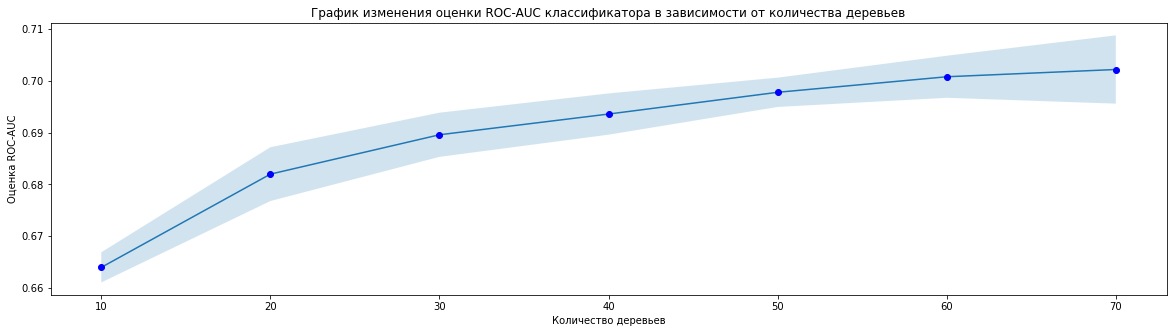

In [11]:
gb_lin_mean = []
gb_bound_max = []
gb_bound_min = []
for i in gb_scor.keys():
    std = gb_scor[i].std(ddof=1)/np.sqrt(len(gb_scor[i]))
    k, b = _tconfint_generic(gb_scor[i].mean(), std, len(gb_scor[i]) - 1, 0.05, 'two-sided')
    gb_lin_mean.append(gb_scor[i].mean())
    gb_bound_min.append(k)
    gb_bound_max.append(b)

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title(u"График изменения оценки ROC-AUC классификатора в зависимости от количества деревьев")
ax.set_xlabel("Количество деревьев")
ax.set_ylabel("Оценка ROC-AUC")
ax.plot(gb_scor.keys(), gb_lin_mean, '-')
ax.fill_between(gb_scor.keys(), gb_bound_min, gb_bound_max, alpha=0.2)
ax.plot(gb_scor.keys(), gb_lin_mean, 'o', color='blue')

In [12]:
print("Оценка ROC-AUC качества алгоритма градиентного бустинга над решающими деревьями при заданном количестве деревьев:")
for i in gb_scor.keys():
    print('C = {}: mean ROC-AUC = {}, std ROC-AUC = {}'.format(i, np.round(gb_scor[i].mean(),2),np.round(gb_scor[i].std(),3))) 

Оценка ROC-AUC качества алгоритма градиентного бустинга над решающими деревьями при заданном количестве деревьев:
C = 10: mean ROC-AUC = 0.66, std ROC-AUC = 0.002
C = 20: mean ROC-AUC = 0.68, std ROC-AUC = 0.004
C = 30: mean ROC-AUC = 0.69, std ROC-AUC = 0.003
C = 40: mean ROC-AUC = 0.69, std ROC-AUC = 0.003
C = 50: mean ROC-AUC = 0.7, std ROC-AUC = 0.002
C = 60: mean ROC-AUC = 0.7, std ROC-AUC = 0.003
C = 70: mean ROC-AUC = 0.7, std ROC-AUC = 0.005


**Вопрос:** Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге?<br>
<font color='green'>**Ответ:**</font> с увеличением числа деревье от 10 до 70 оценка ROC-AUC изменилась менее чем на 3%. Начиная с 50 деревьев метрика ROC-AUC существенно не изменяется. Увеличение числа деревьев с 50 шт. не имеет смысла, в связи с примерно одинаковым качеством предсказания всех последующих алгоритмов. Оценка ROC-AUC при 50 деревьев составила 0,70 д.е.

**Вопрос:** Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?<br>
<font color='green'>**Ответ:**</font> 
<ol>
    <li>Уменьшить максимальную глубину деревьев, задав max_depth меньше 3;</li>
    <li>Предварительно уменьшить обучающую выборку;</li>
    <li>Сократить количество выделяемых листов, скорректировав параметр min_samples_leaf.</li>
</ol>

# Подход 2. Логистическая регрессия. Решение

**1.** Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

In [11]:
scaler = preprocessing.StandardScaler()

train_features_scaled = scaler.fit_transform(train_features)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
%%time
kf = model_selection.KFold(n_splits=5, shuffle=True)
C = [0.000001]+[0.00001]+[0.001*np.power(10,i) for i in range(5)]+[100]
clf_log_scor = {} 

for j, i in enumerate(C):
    start_time = datetime.datetime.now()

    clf = LogisticRegression(C=i)
    roc_list = cross_val_score(estimator = clf, X = train_features_scaled, y = y, cv = kf, scoring='roc_auc')
    clf_log_scor[i] = np.round(roc_list,3)
    
    print(f'{j+1} Time elapsed (C={i}):', datetime.datetime.now() - start_time)

1 Time elapsed (C=1e-06): 0:00:00.897610
2 Time elapsed (C=1e-05): 0:00:01.064953
3 Time elapsed (C=0.001): 0:00:01.925881
4 Time elapsed (C=0.01): 0:00:02.766895
5 Time elapsed (C=0.1): 0:00:02.940043
6 Time elapsed (C=1.0): 0:00:02.714102
7 Time elapsed (C=10.0): 0:00:02.643326
8 Time elapsed (C=100): 0:00:02.935633
Wall time: 17.9 s


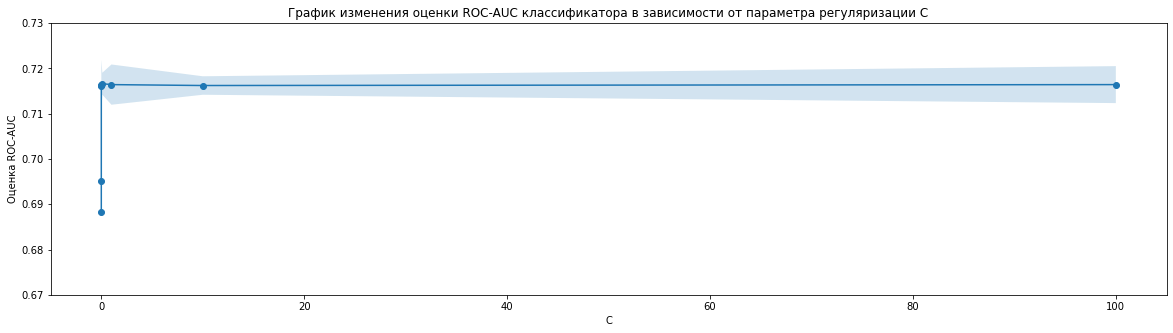

In [14]:
log_lin_mean = []
log_bound_max = []
log_bound_min = []
for i in clf_log_scor.keys():
    std = clf_log_scor[i].std(ddof=1)/np.sqrt(len(clf_log_scor[i]))
    k, b = _tconfint_generic(clf_log_scor[i].mean(), std, len(clf_log_scor[i]) - 1, 0.05, 'two-sided')
    log_lin_mean.append(clf_log_scor[i].mean())
    log_bound_min.append(k)
    log_bound_max.append(b)

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title(u"График изменения оценки ROC-AUC классификатора в зависимости от параметра регуляризации С")
ax.set_ylim((0.67, 0.73))
ax.set_xlabel("С")
ax.set_ylabel("Оценка ROC-AUC")
ax.plot(clf_log_scor.keys(), log_lin_mean, 'o-')
ax.fill_between(clf_log_scor.keys(), log_bound_min, log_bound_max, alpha=0.2)

In [15]:
print("Оценка метрики ROC-AUC качества предсказательного алгоритма логистической регрессии при заданном параметре регуляризации С:")
for i in clf_log_scor.keys():
    print('C = {}: mean ROC-AUC = {}, std ROC-AUC = {}'.format(i, np.round(clf_log_scor[i].mean(),2),np.round(clf_log_scor[i].std(),3))) 

Оценка метрики ROC-AUC качества предсказательного алгоритма логистической регрессии при заданном параметре регуляризации С:
C = 1e-06: mean ROC-AUC = 0.69, std ROC-AUC = 0.002
C = 1e-05: mean ROC-AUC = 0.7, std ROC-AUC = 0.003
C = 0.001: mean ROC-AUC = 0.72, std ROC-AUC = 0.003
C = 0.01: mean ROC-AUC = 0.72, std ROC-AUC = 0.004
C = 0.1: mean ROC-AUC = 0.72, std ROC-AUC = 0.002
C = 1.0: mean ROC-AUC = 0.72, std ROC-AUC = 0.003
C = 10.0: mean ROC-AUC = 0.72, std ROC-AUC = 0.001
C = 100: mean ROC-AUC = 0.72, std ROC-AUC = 0.003


<font color='green'>**Вывод:**</font>
Точность и время обучения алгоритма не изменилась в диапазоне подбираемого параметра регуляризации C [от 1*10^-6 до 100].<br> Величина ROC-AUC по данным кросс-валидации на обучающей выборке составила 0,72 д.е. Для сравнения нанесем оцениваемые метрики алгоритов логистической регрессии при C=0.1 и градиентного бустинга над 50-ю деревьями на диаграмму "ящик "с усами".

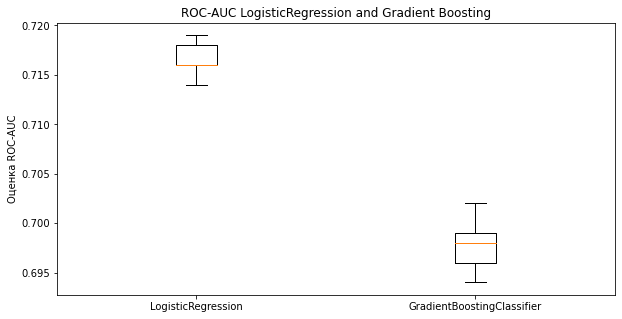

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('ROC-AUC LogisticRegression and Gradient Boosting')
ax.set_ylabel("Оценка ROC-AUC")

bx = ax.boxplot([clf_log_scor[0.1], gb_scor[50]], labels=['LogisticRegression', 'GradientBoostingClassifier'])

<font color='green'>**Ответ:**</font>
Из рассматриваемого графика видно, что алгоритм логистической регрессии имеет более высокую предсказательную способность, чем градиентый бустинг, однако эта разница весьма небольшая (0,72 > 0.70). Следует отметить, что скорость обучения алгоритма логистической регрессии существенно выше, чем градиентный бустинг (например: скорость обучения лог.регрессии при C=0.1 более чем в 50 раз выше, чем у градиентного бустинга на 50 деревьях). Разница в предсказательной спобности двух семейст алгоритмов может обуславливаться большей линейной зависимостью меток класса от рассматриваемых признаков, в связи с чем логистическая регрессия с L2-регуляризацией на обучающих данных показала большую обобщающую способность.

**2.** Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

In [17]:
train_features_without_cat = train_features.drop(columns=['r' + str(j) +'_hero' for j in range(1,6)]+
                                                 ['d' + str(j) +'_hero' for j in range(1,6)]+['lobby_type'])
train_features_without_cat.head()

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,5,2098,1489,20,0,0,7,3,842,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,4,1188,1033,9,0,1,12,4,1596,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,4,1319,1270,22,0,0,12,3,1314,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,4,1779,1056,14,0,0,5,2,539,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,4,1431,1090,8,1,0,8,2,629,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [18]:
%%time
train_features_without_cat_scaled = scaler.fit_transform(train_features_without_cat)

# kf = model_selection.KFold(n_splits=5, shuffle=True)

C = [0.000001]+[0.00001]+[0.001*np.power(10,i) for i in range(5)]+[100]
clf_log_scor_wc = {} 

for j, i in enumerate(C):
    start_time = datetime.datetime.now()

    clf = LogisticRegression(C=i)
    roc_list = cross_val_score(estimator = clf, X = train_features_without_cat_scaled, y = y, cv = kf, scoring='roc_auc')
    clf_log_scor_wc[i] = np.round(roc_list,3)
    
    print(f'{j+1} Time elapsed (C={i}):', datetime.datetime.now() - start_time)

1 Time elapsed (C=1e-06): 0:00:00.964151
2 Time elapsed (C=1e-05): 0:00:01.081716
3 Time elapsed (C=0.001): 0:00:02.314162
4 Time elapsed (C=0.01): 0:00:02.840706
5 Time elapsed (C=0.1): 0:00:02.675306
6 Time elapsed (C=1.0): 0:00:02.922810
7 Time elapsed (C=10.0): 0:00:03.061918
8 Time elapsed (C=100): 0:00:02.752989
Wall time: 18.9 s


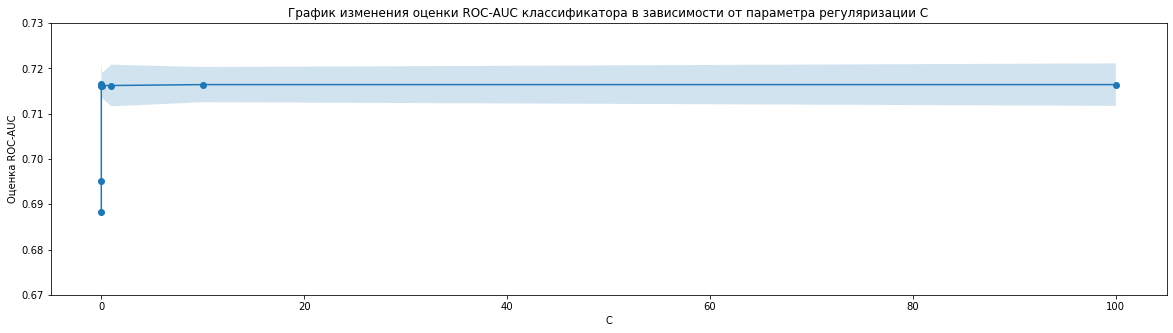

In [19]:
log_wc_lin_mean = []
log_wc_bound_max = []
log_wc_bound_min = []
for i in clf_log_scor_wc.keys():
    std = clf_log_scor_wc[i].std(ddof=1)/np.sqrt(len(clf_log_scor_wc[i]))
    k, b = _tconfint_generic(clf_log_scor_wc[i].mean(), std, len(clf_log_scor_wc[i]) - 1, 0.05, 'two-sided')
    log_wc_lin_mean.append(clf_log_scor_wc[i].mean())
    log_wc_bound_min.append(k)
    log_wc_bound_max.append(b)

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title(u"График изменения оценки ROC-AUC классификатора в зависимости от параметра регуляризации С")
ax.set_ylim((0.67, 0.73))
ax.set_xlabel("С")
ax.set_ylabel("Оценка ROC-AUC")
ax.plot(clf_log_scor_wc.keys(), log_wc_lin_mean, 'o-')
ax.fill_between(clf_log_scor_wc.keys(), log_wc_bound_min, log_wc_bound_max, alpha=0.2)

In [20]:
print("Оценка метрики ROC-AUC качества предсказательного алгоритма логистической регрессии при заданном параметре регуляризации С" \
      "без учета категориальных признаков:")
for i in clf_log_scor_wc.keys():
    print('C = {}: mean ROC-AUC = {}, std ROC-AUC = {}'.format(i, np.round(clf_log_scor_wc[i].mean(),2),np.round(clf_log_scor_wc[i].std(),3))) 

Оценка метрики ROC-AUC качества предсказательного алгоритма логистической регрессии при заданном параметре регуляризации Сбез учета категориальных признаков:
C = 1e-06: mean ROC-AUC = 0.69, std ROC-AUC = 0.002
C = 1e-05: mean ROC-AUC = 0.7, std ROC-AUC = 0.004
C = 0.001: mean ROC-AUC = 0.72, std ROC-AUC = 0.003
C = 0.01: mean ROC-AUC = 0.72, std ROC-AUC = 0.003
C = 0.1: mean ROC-AUC = 0.72, std ROC-AUC = 0.002
C = 1.0: mean ROC-AUC = 0.72, std ROC-AUC = 0.003
C = 10.0: mean ROC-AUC = 0.72, std ROC-AUC = 0.003
C = 100: mean ROC-AUC = 0.72, std ROC-AUC = 0.003


Для сравнения предсказательной способности алгоритмов LogisticRegression с учетом и без учета категориальных признаков выведем их на едином графике

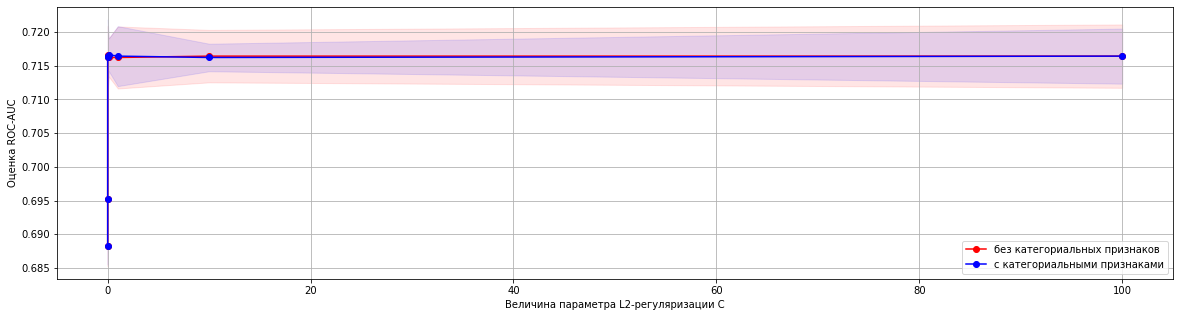

In [21]:
plt.figure(figsize=(20,5))
plt.xlabel("Величина параметра L2-регуляризации C")
plt.ylabel("Оценка ROC-AUC")

plt.grid()

plt.fill_between(clf_log_scor_wc.keys(), log_wc_bound_min, log_wc_bound_max, alpha=0.1,
                 color="r")
plt.fill_between(clf_log_scor.keys(), log_bound_min, log_bound_max, alpha=0.1,
                 color="b")
plt.plot(clf_log_scor_wc.keys(), log_wc_lin_mean, 'o-', color="r",
         label="без категориальных признаков")
plt.plot(clf_log_scor.keys(), log_lin_mean, 'o-', color="b",
         label="с категориальными признаками")

plt.legend(loc="lower right")

<font color='green'>**Ответ:**</font>
Качество предсказательной модели не изменилось после удаления категориальных признаков. Данный факт объясняется малыми весами при категориальных признаках в первой обученной модели, так как в данном виде они обладают малой информативностью 

**3.** На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [22]:
heroes_columns = ['r' + str(j) +'_hero' for j in range(1,6)]+['d' + str(j) +'_hero' for j in range(1,6)]

array_heroes = np.unique(train_features[heroes_columns].values.reshape(-1))

print('Список встречаемых героев в обучающей выборке - \n\n', array_heroes, 
      '\n\nВсего героев в обучающей выборке - ', len(array_heroes))

Список встречаемых героев в обучающей выборке - 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 109 110 112] 

Всего героев в обучающей выборке -  108


Однако для сверки считаем перечень героев из файла 'heroes.csv' из папки 'dictionaries'

In [23]:
dic_heroes = pd.read_csv('data/dictionaries/heroes.csv')['id'].values
dic_heroes = dic_heroes
print('Список встречаемых героев из словаря - \n\n', dic_heroes, 
      '\n\nВсего героев в словаре - ', len(dic_heroes))

Список встречаемых героев из словаря - 

 [  1   2   3   4   5   6   7   8   9  11  10  12  13  14  15  16  17  18
  19  20  21  22  23  25  31  26  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  69  68  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110
 105 111 112 113] 

Всего героев в словаре -  112


In [24]:
print('Список героев, которые не были в стречены в обучающей выборке, но присутствуют в словаре - ')
mask = [~np.isin(i, array_heroes) for i in dic_heroes]
print(' '.join(map(str, dic_heroes[mask].tolist())))

Список героев, которые не были в стречены в обучающей выборке, но присутствуют в словаре - 
107 108 111 113


In [25]:
N = len(dic_heroes)

**4.** Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [26]:
%%time
X_pick = np.zeros((train_features.shape[0], N))

for i, match_id in enumerate(train_features.index):
    for p in range(5):
        X_pick[i, train_features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, train_features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

Wall time: 15.2 s


In [35]:
X_train = np.hstack([train_features_without_cat, X_pick])

X_train_scaled = scaler.fit_transform(X_train)

**5.** Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?

In [36]:
%%time

C = [10**i for i in range(-5,3)]
clf_log_b = {} 

for j, i in enumerate(C):
    start_time = datetime.datetime.now()

    clf = LogisticRegression(C=i)
    roc_list = cross_val_score(estimator = clf, X = X_train_scaled, y = y, cv = kf, scoring='roc_auc')
    clf_log_b[i] = np.round(roc_list,3)
    
    print(f'{j+1} Time elapsed (C={i}):', datetime.datetime.now() - start_time)

1 Time elapsed (C=1e-05): 0:00:01.595943
2 Time elapsed (C=0.0001): 0:00:01.764692
3 Time elapsed (C=0.001): 0:00:03.324348
4 Time elapsed (C=0.01): 0:00:05.027806
5 Time elapsed (C=0.1): 0:00:05.018086
6 Time elapsed (C=1): 0:00:05.455722
7 Time elapsed (C=10): 0:00:05.192079
8 Time elapsed (C=100): 0:00:05.876087
Wall time: 33.3 s


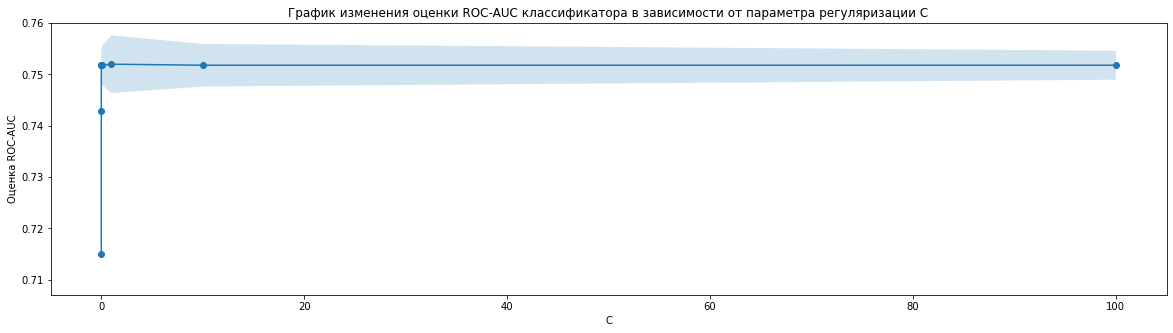

In [39]:
log_b_lin_mean = []
log_b_bound_max = []
log_b_bound_min = []
for i in clf_log_b.keys():
    std = clf_log_b[i].std(ddof=1)/np.sqrt(len(clf_log_b[i]))
    k, b = _tconfint_generic(clf_log_b[i].mean(), std, len(clf_log_b[i]) - 1, 0.05, 'two-sided')
    log_b_lin_mean.append(clf_log_b[i].mean())
    log_b_bound_min.append(k)
    log_b_bound_max.append(b)

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title(u"График изменения оценки ROC-AUC классификатора в зависимости от параметра регуляризации С")
ax.set_xlabel("С")
ax.set_ylabel("Оценка ROC-AUC")
ax.plot(clf_log_b.keys(), log_b_lin_mean, 'o-')
ax.fill_between(clf_log_b.keys(), log_b_bound_min, log_b_bound_max, alpha=0.2)

In [40]:
print("Оценка метрики ROC-AUC качества предсказательного алгоритма логистической регрессии при заданном \nпараметре регуляризации С" \
      " с учетом подготовленных категориальных признаков:")
for i in clf_log_b.keys():
    print('C = {}: mean ROC-AUC = {}, std ROC-AUC = {}'.format(i, np.round(clf_log_b[i].mean(),2),np.round(clf_log_b[i].std(),3))) 

Оценка метрики ROC-AUC качества предсказательного алгоритма логистической регрессии при заданном 
параметре регуляризации С с учетом подготовленных категориальных признаков:
C = 1e-05: mean ROC-AUC = 0.72, std ROC-AUC = 0.004
C = 0.0001: mean ROC-AUC = 0.74, std ROC-AUC = 0.003
C = 0.001: mean ROC-AUC = 0.75, std ROC-AUC = 0.001
C = 0.01: mean ROC-AUC = 0.75, std ROC-AUC = 0.002
C = 0.1: mean ROC-AUC = 0.75, std ROC-AUC = 0.003
C = 1: mean ROC-AUC = 0.75, std ROC-AUC = 0.004
C = 10: mean ROC-AUC = 0.75, std ROC-AUC = 0.003
C = 100: mean ROC-AUC = 0.75, std ROC-AUC = 0.002


<font color='green'>**Ответ:**</font>
Качество предсказательния алгоритма улучшилось после подготовленных категориальных признаков (представления данных из столбцов "hero" в единичных векторах, по аналогии с идеей "мешок слов"). Качество модели модели по данным метрики ROC-AUC увеличилось до 0.75. Данный факт объясняет важность выбора героев для достижения победы в рассматриваемой игре

**6.** Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

In [55]:
data_test = pd.read_csv('features_test.csv', index_col='match_id')
data_test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


#### ETL

In [61]:
data_test_wc = data_test.drop(columns=['r' + str(j) +'_hero' for j in range(1,6)]+
                                                 ['d' + str(j) +'_hero' for j in range(1,6)]+['lobby_type'])
data_test_wc.fillna(0, inplace=True)

X_test_pick = np.zeros((data_test.shape[0], N))

for i, match_id in enumerate(data_test.index):
    for p in range(5):
        X_test_pick[i, data_test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_test_pick[i, data_test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

X_test = np.hstack([data_test_wc, X_test_pick])

X_test_scl = scaler.transform(X_test)

In [62]:
best_clf = LogisticRegression(C=0.1)
best_clf.fit(X_train_scaled, y)

y_pred = best_clf.predict_proba(X_test_scl)

In [77]:
res = pd.DataFrame(index = data_test_wc.index, data = y_pred[:,1], columns=['radiant_win'])

In [78]:
res.to_csv('OorzhakAU.csv')

In [85]:
p_min = round(float(res.min()),3)
p_max = round(float(res.max()),3)
print('Min P - {}, Max P {}\n\n'.format(p_min, p_max))

Min P - 0.008, Max P 0.996




## Проверка финальной модели

После того как вы провели все эксперименты и выбрали лучшую модель, можете проверить ее качество на тестовых матчах. Выборка тестовых матчей собрана в файле `matches_test.jsonlines.bz2`. В отличие от основного набора матчей, в тестовых матчах есть только та информация, которая известна на момент первых 5 игровых минут, результат матча — неизвестен. Таблица признаков для тестовых матчей — `features_test.csv`.

Для всех матчей из тестового набора предскажите вероятность победы Radiant, запишите предсказания в CSV файл с колонками `match_id` (идентификатор матча) и `radiant_win` — предсказанная вероятность. Файл с предсказаниями должен выглядеть примерно следующим образом:

```
match_id,radiant_win
1,0.51997370502
4,0.51997370502
15,0.51997370502
...
```

Отправьте решение на Kaggle в соревнование: Dota 2: Win Probability Prediction.

Ссылка на соревнование: [Dota 2: Win Probability Prediction](https://kaggle.com/join/coursera_ml_dota2_contest)

### <font color='green'>Результат:</font>
Загрузка файла 'OorzhakAU.csv' с предсказаниями на kaggle дала следующую метрику:
**Score = 0.75527**